In [1]:
#!pip install pandas_profiling

In [11]:
#!pip install mlxtend

In [12]:
from urllib import request
from urllib.request import urlretrieve as retrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import random
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
import glob
import urllib
from scipy import stats
import timeit
import urllib.request
import os
from mlxtend.preprocessing import minmax_scaling

In [13]:
#mettre a la meme échelle
def all_minmax_scale(dataset_num_clean):
    for col in list(dataset_num_clean):
        dataset_num_clean[col] = minmax_scaling(dataset_num_clean[col], columns =[0])
    return dataset_num_clean

In [14]:
#supprimer les outlier à la main
def remove_outlier(dataset_num, col_name):
    q1 = dataset_num[col_name].quantile(0.25)
    q3 = dataset_num[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    dataset_num_clean = dataset_num.loc[(dataset_num[col_name] > fence_low) & (dataset_num[col_name] < fence_high)]
    return dataset_num_clean

In [15]:
#afficher les données
def affichage(data):
    type_objet = ['int64','object']
    valeur = input('Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: ') #object ou int64
    var_numerique, var_categorielle = data.select_dtypes(include=type_objet[1]), data.select_dtypes(include=type_objet[0])  
    if valeur == type_objet[1] :
        for col in var_categorielle: 
            if data[col].nunique()<30: 
                sns.countplot (y = col, data = data) 
                plt.show()               
    else:
        for col in var_numerique: 
            if data[col].nunique()<30: 
                sns.countplot (y = col, data = data) 
                plt.show()
    return var_numerique,var_categorielle 

In [16]:
def dataset_encoding(nlignes_num, ncol_num, dataset_cat_encoding, dataset_num):
    dataset_cat_encoding = dataset_cat_encoding[:nlignes_num]
    dataset_encoding = dataset_num.merge(dataset_cat_encoding, how = 'inner', left_index= True, right_index = True)
    return dataset_encoding

### RECUPERATION DATA

In [17]:
extension = '.csv'
filename = "datarisk.csv"
destination_dir = "/Users/claudetob/Desktop/PROJET/ML_project/Data/"
url = "https://pkgstore.datahub.io/machine-learning/credit-g/credit-g_csv/data/ac05ce3bfd911258bd37fde1e8a3051f/credit-g_csv.csv"
urllib.request.urlretrieve(url, destination_dir+"datarisk{}".format(extension))
file_path = os.path.join(destination_dir, filename)

In [18]:
data = pd.read_csv(file_path)
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


## EXPLORATION 

Entrez "object" pour avoir les variables categorielles et "num" pour avoir les variables numériques: 


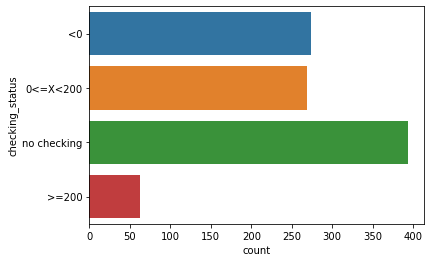

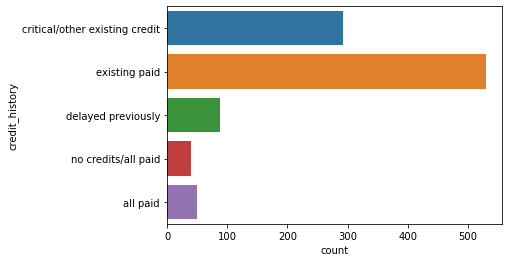

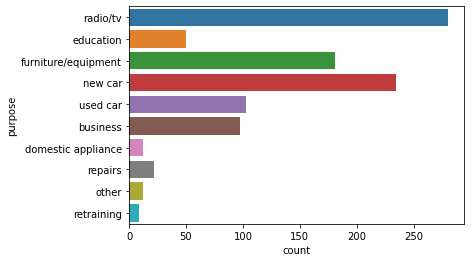

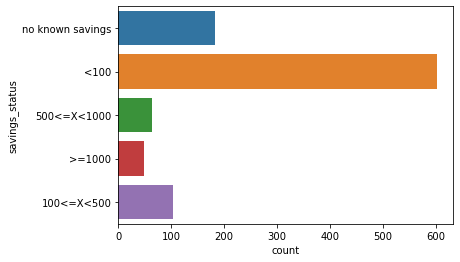

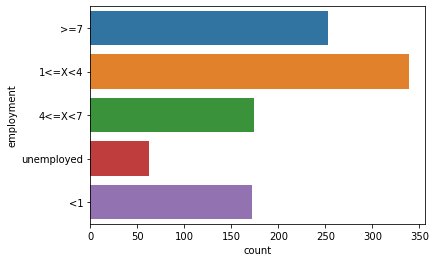

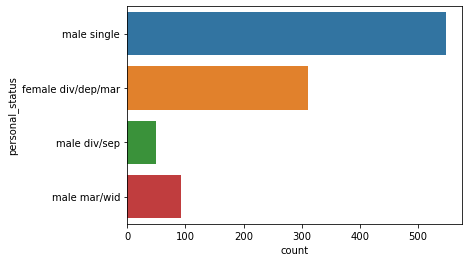

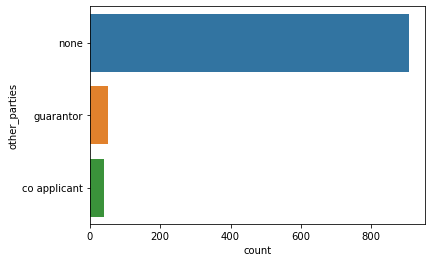

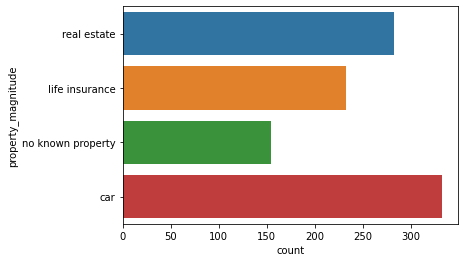

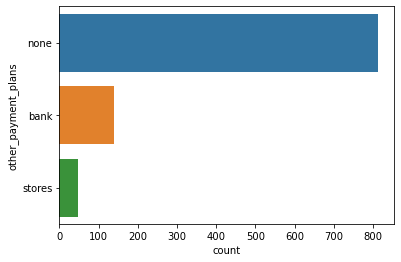

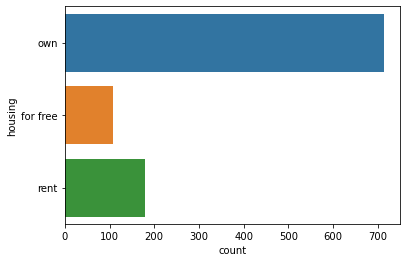

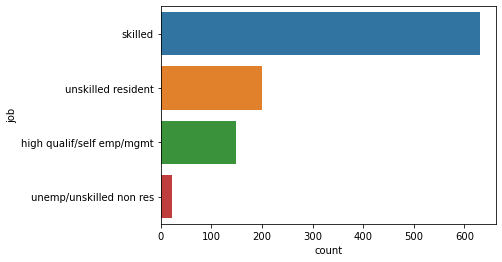

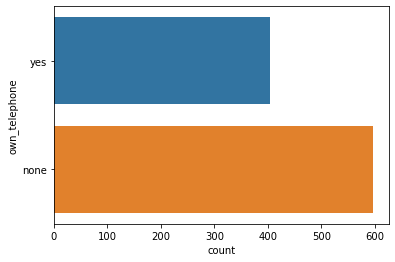

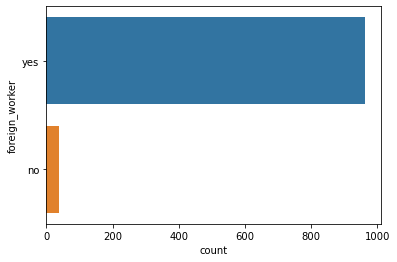

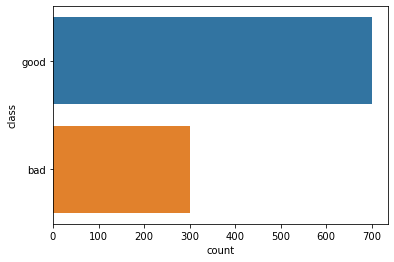

In [19]:
dataset_cat, dataset_num = affichage(data)

### Compréhension de la donnée

### Plot  Exploration

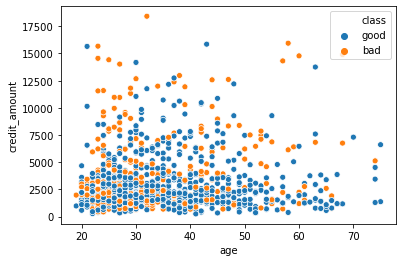

In [20]:
sns.scatterplot('age','credit_amount',data=data,hue='class')

#### La plupart des risques de bad crédits se situent entre 20 et 60 ans.
#### Le montant pour ces risques de mauvais crédit se situe dans une fourchette de 0 à 12500.

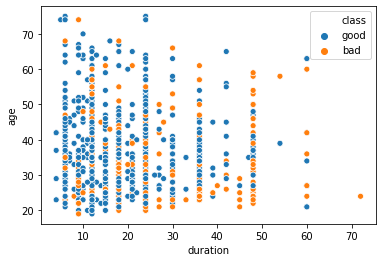

In [21]:
sns.scatterplot('duration','age',data=data,hue='class')

#### La plupart des risques de mauvais crédit ont une durée d'au moins 12 mois et peuvent aller jusqu'à 60 mois.
#### La plupart de ces mauvais risques de crédit sont âgés de 20 à 60 ans.

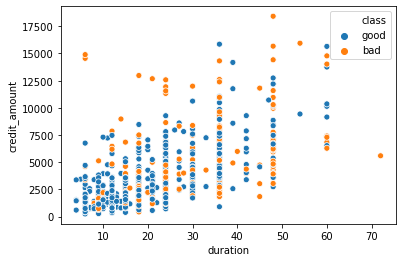

In [22]:
sns.scatterplot('duration','credit_amount',data=data,hue='class')

#### La plupart des risques de mauvais crédit ont une durée d'au moins 12 mois et peuvent aller jusqu'à 60 mois.
#### Plus la durée du risque de mauvais crédit augmente, plus le montant augmente.

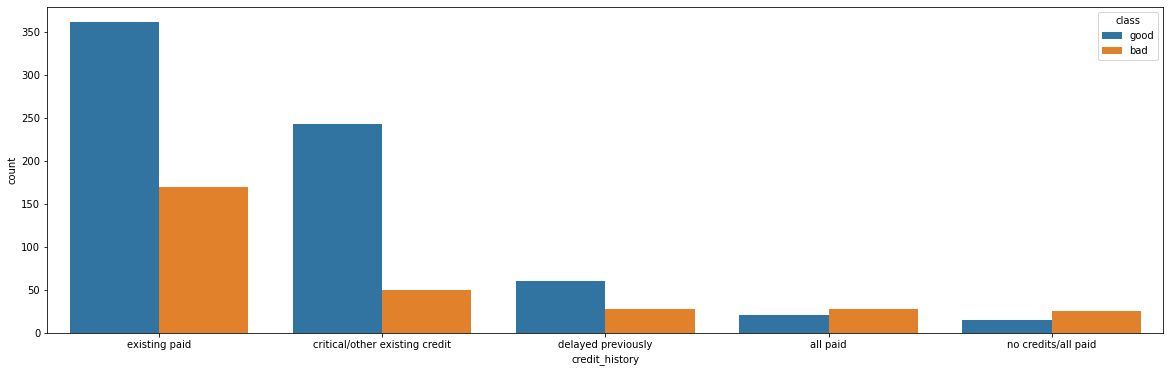

In [23]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='credit_history', order=data['credit_history'].value_counts().index, data=data, hue='class')

In [24]:
data[data['class'] == 'bad']['credit_history'].value_counts().values[0]/530 * 100

31.886792452830186

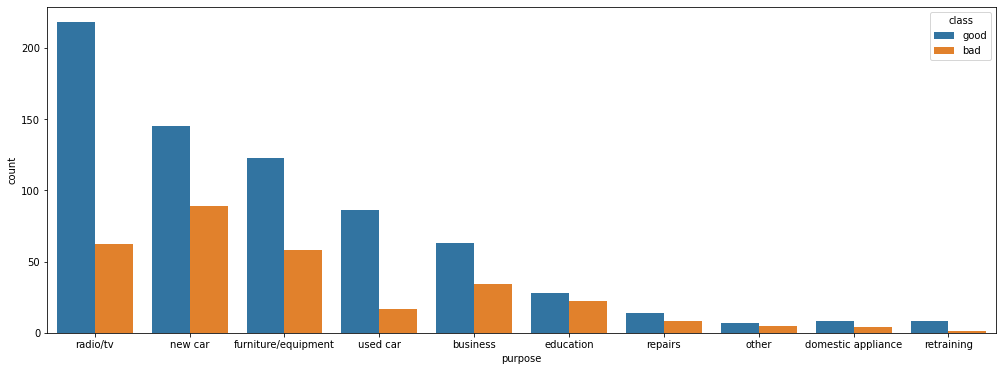

In [25]:
fig_dims = (17, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='purpose', order=data['purpose'].value_counts().index, data=data, hue='class')

In [26]:
data[data['class'] =='good']['purpose'].value_counts()

radio/tv               218
new car                145
furniture/equipment    123
used car                86
business                63
education               28
repairs                 14
retraining               8
domestic appliance       8
other                    7
Name: purpose, dtype: int64

In [27]:
data[data['class'] =='bad']['purpose'].value_counts().values[0]/ 300 * 100
#30 % des cas de mauvais crédit ont une voiture (d'occasion ou neuve).

29.666666666666668

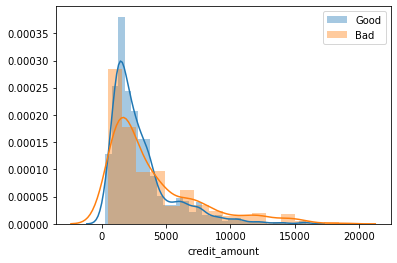

In [28]:
sns.distplot(data[data['class']=='good']['credit_amount'])
sns.distplot(data[data['class']=='bad']['credit_amount'])
plt.legend(['Good','Bad'])

#Le montant de la plupart de bon et de mauvais risque se situe entre 0 et 5000.
#chevauchement important, 
#pic des bons risques de crédit est plus élevé que celui des mauvais, il semble donc que le montant moyen des bons risque de crédit soit supérieur à celui des mauvais de risque.

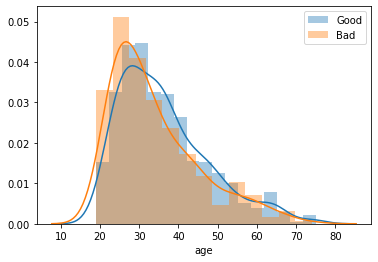

In [29]:
sns.distplot(data[data['class']=='good']['age'])
sns.distplot(data[data['class']=='bad']['age'])
plt.legend(['Good','Bad'])
#L'âge de la plupart des bons et mauvais risques de crédit se situe dans la fourchette de 20 à 60 ans.
#Le chevauchement est important, il semble donc que l'âge moyen des dossiers de bons et de mauvais risques de crédit soit presque égal

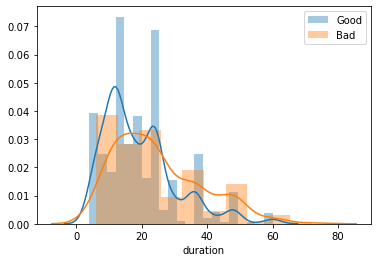

In [30]:
sns.distplot(data[data['class']=='good']['duration'])
sns.distplot(data[data['class']=='bad']['duration'])
plt.legend(['Good','Bad'])

#La durée de la plupart des bons et mauvais risques de crédit se situe dans une fourchette d'environ 9 à 50 mois.
#Le chevauchement est très faible, il semble donc que la durée moyenne de bon et de mauvais risque de crédit diffère significativement

##  CAT

### 1. Encoding

In [31]:
dataset_cat

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,none,real estate,none,own,unskilled resident,none,yes,good
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,none,life insurance,none,own,high qualif/self emp/mgmt,yes,yes,good
997,no checking,existing paid,radio/tv,<100,>=7,male single,none,car,none,own,skilled,none,yes,good
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,none,no known property,none,for free,skilled,yes,yes,bad


In [32]:
variables_list = list(dataset_cat)
slice_cat = 998
variables_ordinales, variables_nominales = [],[]
exception = ["class"]
str2 = '<'
for i in range(len(variables_list)-1):
    if str2 in dataset_cat[variables_list[i]].iloc[slice_cat]:
        variables_ordinales.append(variables_list[i])
    if not str2 in dataset_cat[variables_list[i]].iloc[slice_cat]:
        variables_nominales.append(variables_list[i])

In [33]:
variables_ordinales = variables_ordinales + exception
variables_ordinales

['checking_status', 'savings_status', 'employment', 'class']

In [34]:
dataset_ordinales = dataset_cat[variables_ordinales]
dataset_nominales = dataset_cat[variables_nominales]

In [35]:
dic_check = {"no checking" :"0", '<0':'1', '0<=X<200':'2', '>=200':'3',
'no known savings' :'0', '<100':'1', '100<=X<500':'2', '500<=X<1000':'3', '>=1000':'4',
'unemployed':'0', '<1':'1', '1<=X<4':'2', '4<=X<7':'3', '>=7':'4', 'bad':'0', 'good':'1'}


In [36]:
def cat_encoding(dic_check, dataset_ordinales,dataset_nominales):
    dataset_ordinales_encoding = dataset_ordinales.replace(dic_check)
    dataset_nominales_encoding = pd.get_dummies(dataset_nominales, drop_first = True)
    data_cat_encoding = dataset_ordinales_encoding.merge(dataset_nominales_encoding, how = 'inner', left_index= True, right_index = True)
    return  data_cat_encoding

In [37]:
dataset_cat_encoding =  cat_encoding(dic_check, dataset_ordinales,dataset_nominales)

In [38]:
dataset_cat_encoding

,checking_status,savings_status,employment,class,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,1,0,4,1,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,1
1,2,1,2,0,0,0,1,0,0,0,...,1,1,0,1,0,1,0,0,0,1
2,0,1,3,1,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
3,1,1,3,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1,1,2,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,3,1,0,0,1,0,0,0,...,1,1,0,1,0,0,0,1,0,1
996,1,1,2,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,1
997,0,1,4,1,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
998,1,1,2,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1


In [39]:
#https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

# NUM

In [40]:
#profile = ProfileReport(dataset_num, title='Analyse du Dataset_num')
#profile.to_notebook_iframe()

In [41]:
dataset_num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


 coeff d'asymétrie de  duration : 1.0941841715555418


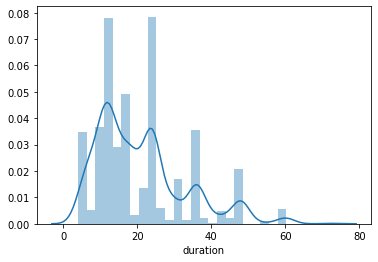

 coeff d'asymétrie de  credit_amount : 1.9496276798326209


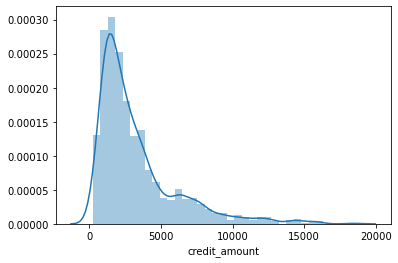

 coeff d'asymétrie de  installment_commitment : -0.5313481143125486


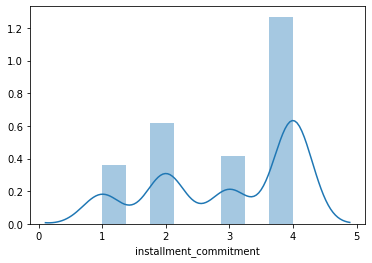

 coeff d'asymétrie de  residence_since : -0.2725698140337228


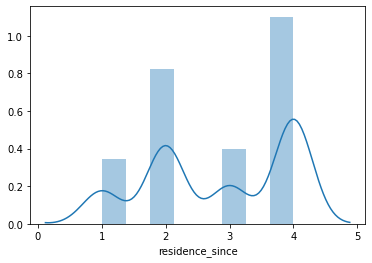

 coeff d'asymétrie de  age : 1.0207392686768317


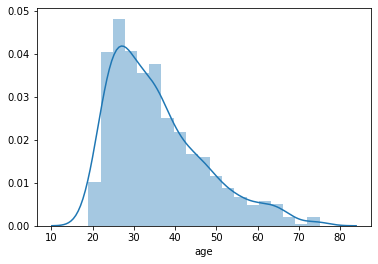

 coeff d'asymétrie de  existing_credits : 1.2725759670020926


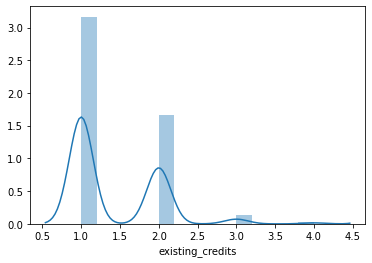

 coeff d'asymétrie de  num_dependents : 1.909444721297485


/Users/claudetob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


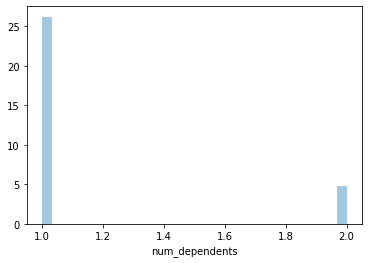

In [42]:
coeff_asymétrie=[]
for i in dataset_num.columns:
    sns.distplot(dataset_num[i])
    print(" coeff d'asymétrie de ",i,":",dataset_num[i].skew())
    coeff_asymétrie.append(dataset_num[i].skew())
    plt.show()  
    


In [43]:
coeff_asymétrie

[1.0941841715555418,
 1.9496276798326209,
 -0.5313481143125486,
 -0.2725698140337228,
 1.0207392686768317,
 1.2725759670020926,
 1.909444721297485]

In [44]:
col_num = list(dataset_num)

###  Outliers - visualisation

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dispersion = [vif(dataset_num.values,i) for i in range(dataset_num.shape[1])]
pd.DataFrame(dispersion, index=col_num, columns= ["dispersion"])
#Dispersion des données entre différentes colonnes numériques

,dispersion
duration,7.358755
credit_amount,4.575758
installment_commitment,7.958660
residence_since,7.735368
age,10.925702
existing_credits,6.679317
num_dependents,8.790639


<Figure size 432x288 with 0 Axes>

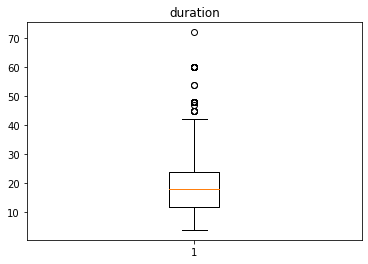

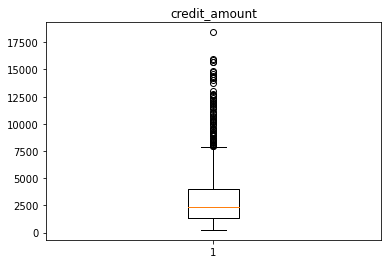

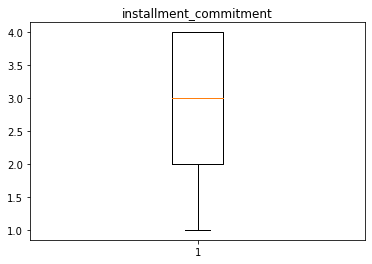

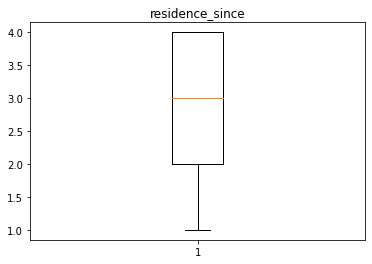

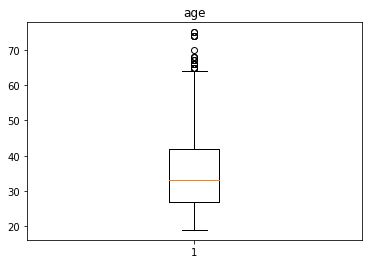

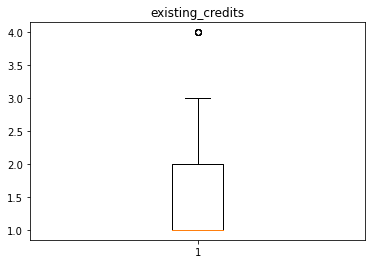

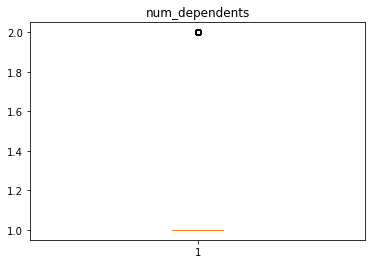

In [46]:
duration = dataset_num['duration']
credit_amount = dataset_num['credit_amount']
installment_commitment = dataset_num['installment_commitment']
residence_since = dataset_num['residence_since']
age = dataset_num[ 'age']
existing_credits = dataset_num['existing_credits']
num_dependents = dataset_num['num_dependents']
#ax = fig.add_subplot(111) #mettre une grid
fig = plt.figure()
fig, ax = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()
fig5,ax5 = plt.subplots()
fig6,ax6 = plt.subplots()
fig7,ax7 = plt.subplots()
ax.boxplot(duration)
ax2.boxplot(credit_amount)
ax3.boxplot(installment_commitment)
ax4.boxplot(residence_since)
ax5.boxplot(age)
ax6.boxplot(existing_credits)
ax7.boxplot(num_dependents)
ax.title.set_text('duration')
ax2.title.set_text('credit_amount')
ax3.title.set_text('installment_commitment')
ax4.title.set_text('residence_since')
ax5.title.set_text('age')
ax6.title.set_text('existing_credits')
ax7.title.set_text('num_dependents')

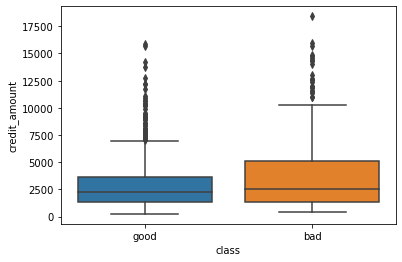

In [47]:
sns.boxplot(x='class',y='credit_amount',data=data)
#### Le montant médian de mauvais risque est presque identique au montant médian des dossiers de bons risque.
#### L'IQR de mauvais risques de crédits est supérieur à l'IQR des risques bon de risque.

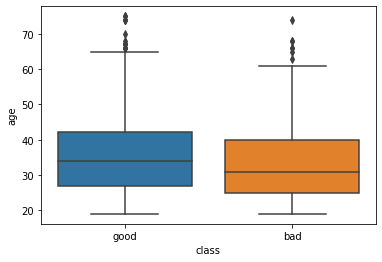

In [48]:
sns.boxplot(x='class',y='age',data=data)
#### L'age médian des personnes de bons crédits est supérieur au montant médian des dossiers de mauvais crédits.
#### L'IQR de mauvais risques de crédits est supérieur à l'IQR des risques bon de crédits.

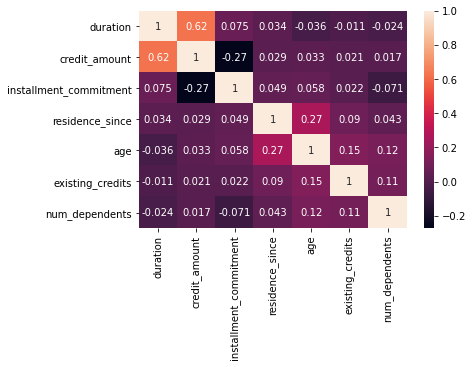

In [49]:
sns.heatmap(dataset_num.corr(), annot=True)
#Forte  correlation positive entre duration et credit amount.
#Basse correlation positive entre residence et age.
#Base négative correlation entre duration et age.

source : https://machinelearningmastery.com/power-transforms-with-scikit-learn/

In [50]:
from sklearn.preprocessing import PowerTransformer

In [51]:
pt = PowerTransformer(method='box-cox') #hypothese distribution gaussienne #minimiser l'asymétrie -> normalisation-> soit uniforme
power_transformed_array = pt.fit_transform(dataset_num)

In [52]:
ptdf_cont = pd.DataFrame(data = power_transformed_array, columns = dataset_num.columns)
ptdf_cont.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,-1.803976,-0.932601,0.949422,1.053021,1.966580,1.280076,-0.428290
1,1.765840,1.156740,-0.945289,-0.777371,-1.609134,-0.760102,-0.428290
2,-0.689848,-0.157834,-0.945289,0.126905,1.210525,-0.760102,2.334869
3,1.515289,1.496003,-0.945289,1.053021,0.976309,-0.760102,2.334869
4,0.498445,0.910973,-0.071035,1.053021,1.415027,1.280076,2.334869


#### coefficient d'asymétrie

coeff d'asymétrie de  duration : -0.01018400445195358


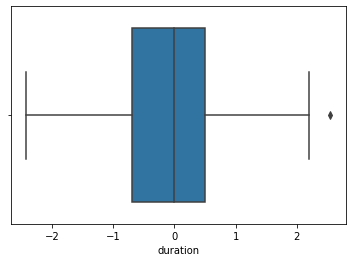

coeff d'asymétrie de  credit_amount : 0.005391480797389958


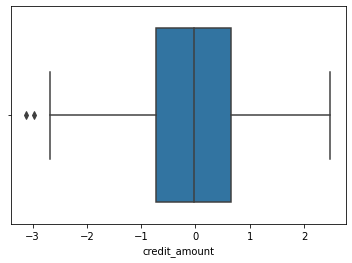

coeff d'asymétrie de  installment_commitment : -0.3832127972358304


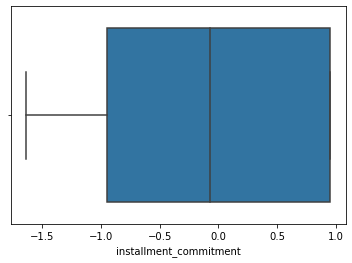

coeff d'asymétrie de  residence_since : -0.24548274411720977


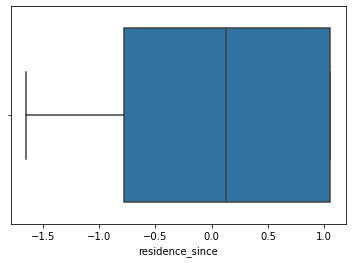

coeff d'asymétrie de  age : 0.0541348473233542


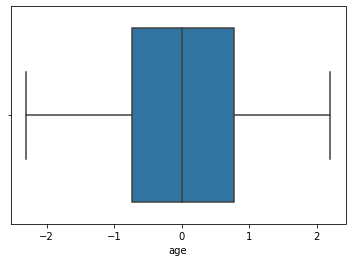

coeff d'asymétrie de  existing_credits : 0.564556792071269


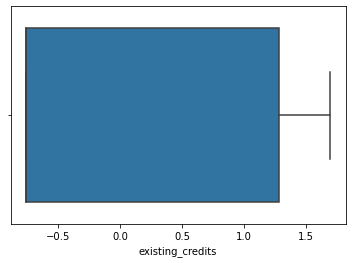

coeff d'asymétrie de  num_dependents : 1.9094447212974837


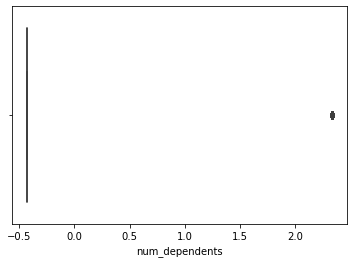

In [53]:
for i in ptdf_cont.columns:
    sns.boxplot(ptdf_cont[i])
    print("coeff d'asymétrie de ",i,":",ptdf_cont[i].skew())
    plt.show() 

 coeff d'asymétrie de  duration : -0.01018400445195358


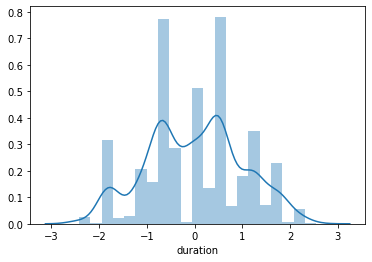

 coeff d'asymétrie de  credit_amount : 0.005391480797389958


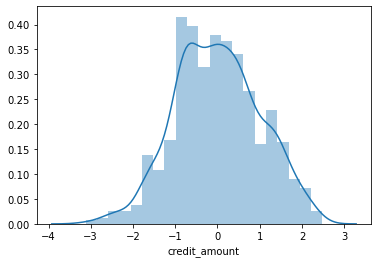

 coeff d'asymétrie de  installment_commitment : -0.3832127972358304


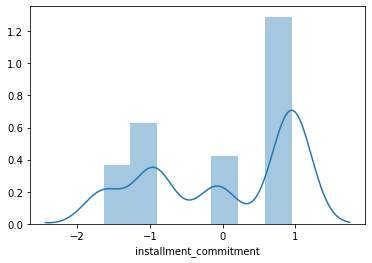

 coeff d'asymétrie de  residence_since : -0.24548274411720977


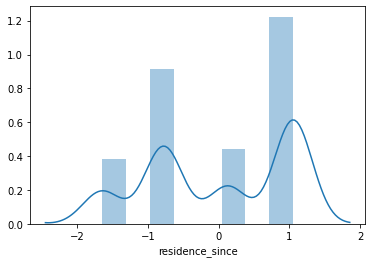

 coeff d'asymétrie de  age : 0.0541348473233542


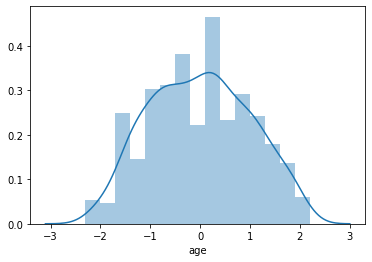

 coeff d'asymétrie de  existing_credits : 0.564556792071269


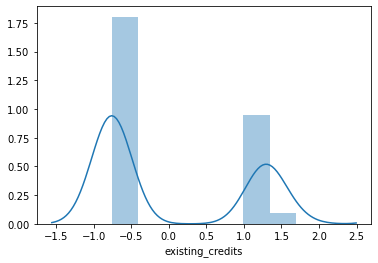

 coeff d'asymétrie de  num_dependents : 1.9094447212974837


/Users/claudetob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


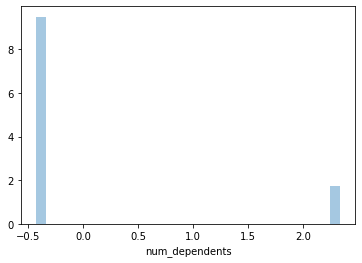

In [54]:
coeff_asym_norm = []
for i in ptdf_cont.columns:
    sns.distplot(ptdf_cont[i])
    print(" coeff d'asymétrie de ",i,":",ptdf_cont[i].skew())
    coeff_asym_norm.append(ptdf_cont[i].skew())
    plt.show()  

#### Corrélation

### FINAL DATASET

In [55]:
dataset_num_clean = all_minmax_scale(ptdf_cont)

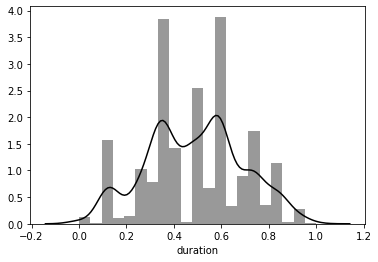

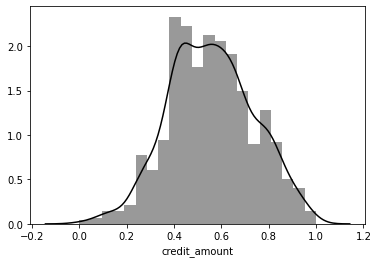

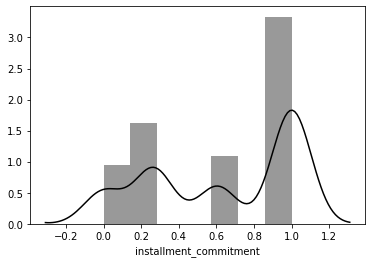

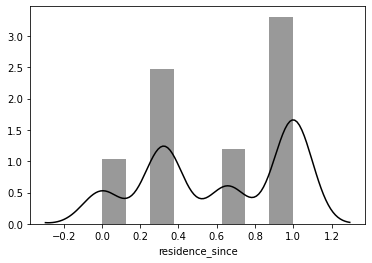

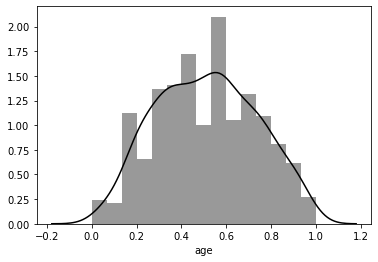

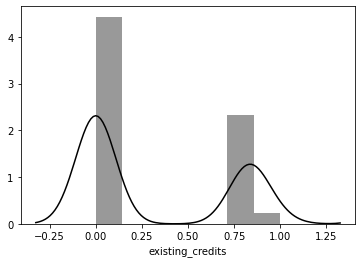

/Users/claudetob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


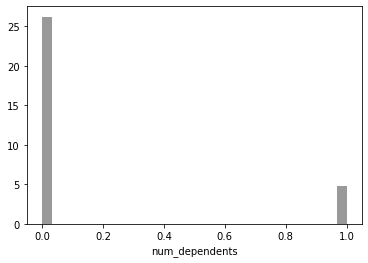

In [56]:
for i in dataset_num_clean.columns:
    sns.distplot(ptdf_cont[i], color='k')
    plt.show()  
    

In [57]:
nlignes_num , ncol_num = dataset_num_clean.shape[0] , dataset_num.shape[1]

In [58]:
dataset_encoding_final = dataset_encoding (nlignes_num, ncol_num, dataset_cat_encoding, dataset_num_clean)

In [59]:
dataset_encoding_final.shape

(1000, 41)

In [60]:
dataset_encoding_final


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,savings_status,employment,...,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes,foreign_worker_yes
0,0.124609,0.390734,1.000000,1.000000,0.947543,0.830615,0.0,1,0,4,...,1,1,0,1,0,1,0,0,1,1
1,0.843004,0.763236,0.266978,0.322597,0.154635,0.000000,0.0,2,1,2,...,1,1,0,1,0,1,0,0,0,1
2,0.348818,0.528864,0.266978,0.657257,0.779889,0.000000,1.0,0,1,3,...,1,1,0,1,0,0,0,1,0,1
3,0.792583,0.823722,0.266978,1.000000,0.727952,0.000000,1.0,1,1,3,...,0,1,0,0,0,1,0,0,0,1
4,0.587952,0.719419,0.605208,1.000000,0.825237,0.830615,1.0,1,1,2,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.348818,0.484846,0.605208,1.000000,0.463052,0.000000,0.0,0,1,3,...,1,1,0,1,0,0,0,1,0,1
996,0.668273,0.667733,1.000000,1.000000,0.651145,0.000000,0.0,1,1,2,...,0,1,0,1,0,0,0,0,1,1
997,0.348818,0.299429,1.000000,1.000000,0.615788,0.000000,0.0,0,1,4,...,0,1,0,1,0,1,0,0,0,1
998,0.818556,0.499128,1.000000,1.000000,0.198648,0.000000,0.0,1,1,2,...,0,1,0,0,0,1,0,0,1,1
